## WDBC Breast cancer dataset EDA


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
column_names = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
data = pd.read_csv(r'C:\Users\kvjai\ML PROJECTS\Breast cancer diagnosis\data\wdbc.data', header=None, names=column_names)

data.drop(columns=["ID"], inplace=True)
print(data.shape)

(569, 31)


In [21]:
data["Diagnosis"] = data["Diagnosis"].map({"M": 1, "B": 0})

print(data.head())

   Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0          1      17.99      10.38     122.80     1001.0    0.11840   
1          1      20.57      17.77     132.90     1326.0    0.08474   
2          1      19.69      21.25     130.00     1203.0    0.10960   
3          1      11.42      20.38      77.58      386.1    0.14250   
4          1      20.29      14.34     135.10     1297.0    0.10030   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_21  Feature_22  \
0    0.27760     0.3001    0.14710     0.2419  ...       25.38       17.33   
1    0.07864     0.0869    0.07017     0.1812  ...       24.99       23.41   
2    0.15990     0.1974    0.12790     0.2069  ...       23.57       25.53   
3    0.28390     0.2414    0.10520     0.2597  ...       14.91       26.50   
4    0.13280     0.1980    0.10430     0.1809  ...       22.54       16.67   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  \
0      184.60      2019.0  

In [22]:
# missing values
print(data.isnull().sum()) 

Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64


In [23]:
print(data.describe())

        Diagnosis   Feature_1   Feature_2   Feature_3    Feature_4  \
count  569.000000  569.000000  569.000000  569.000000   569.000000   
mean     0.372583   14.127292   19.289649   91.969033   654.889104   
std      0.483918    3.524049    4.301036   24.298981   351.914129   
min      0.000000    6.981000    9.710000   43.790000   143.500000   
25%      0.000000   11.700000   16.170000   75.170000   420.300000   
50%      0.000000   13.370000   18.840000   86.240000   551.100000   
75%      1.000000   15.780000   21.800000  104.100000   782.700000   
max      1.000000   28.110000   39.280000  188.500000  2501.000000   

        Feature_5   Feature_6   Feature_7   Feature_8   Feature_9  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.096360    0.104341    0.088799    0.048919    0.181162  ...   
std      0.014064    0.052813    0.079720    0.038803    0.027414  ...   
min      0.052630    0.019380    0.000000    0.000000    0.106000  ...   

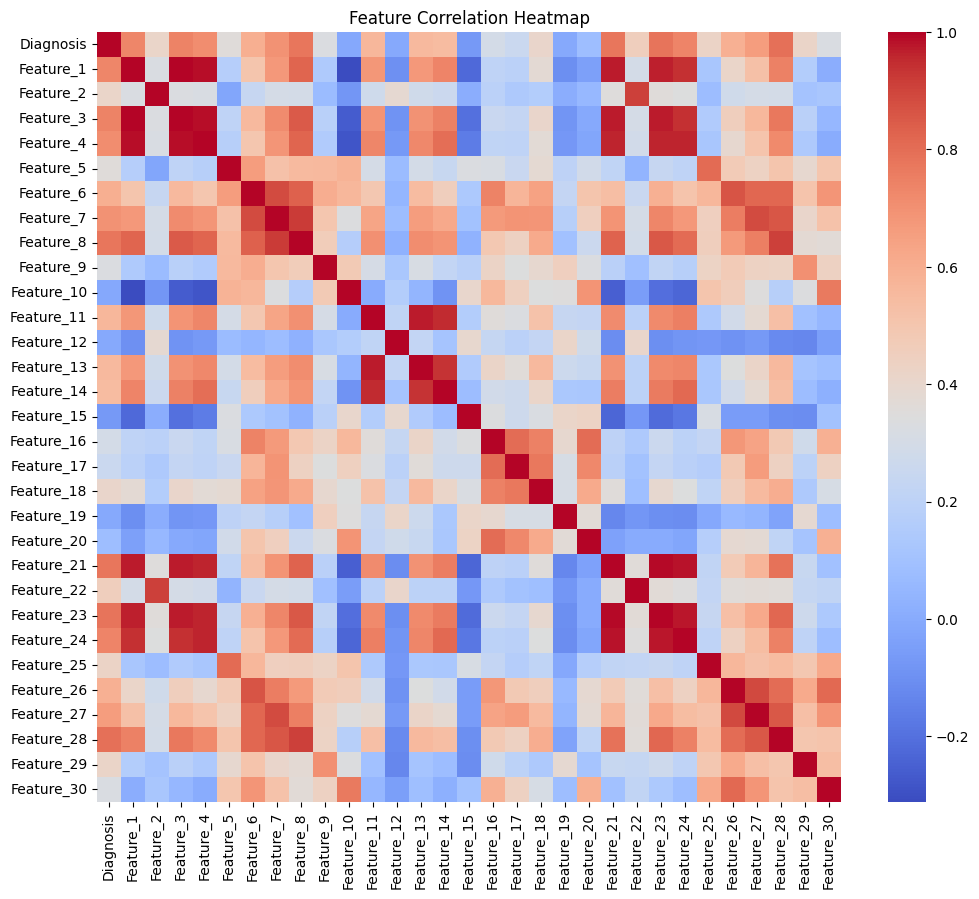

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\kvjai\AppData\Local\Temp\ipykernel_14528\3120569093.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["Diagnosis"], palette=["#1f77b4", "#ff7f0e"])


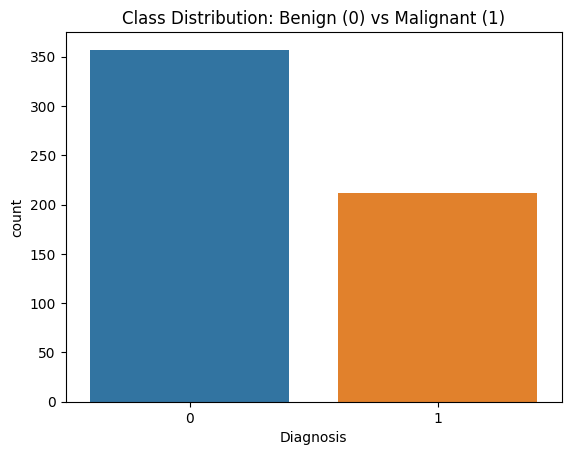

In [25]:
sns.countplot(x=data["Diagnosis"], palette=["#1f77b4", "#ff7f0e"])
plt.title("Class Distribution: Benign (0) vs Malignant (1)")
plt.show()

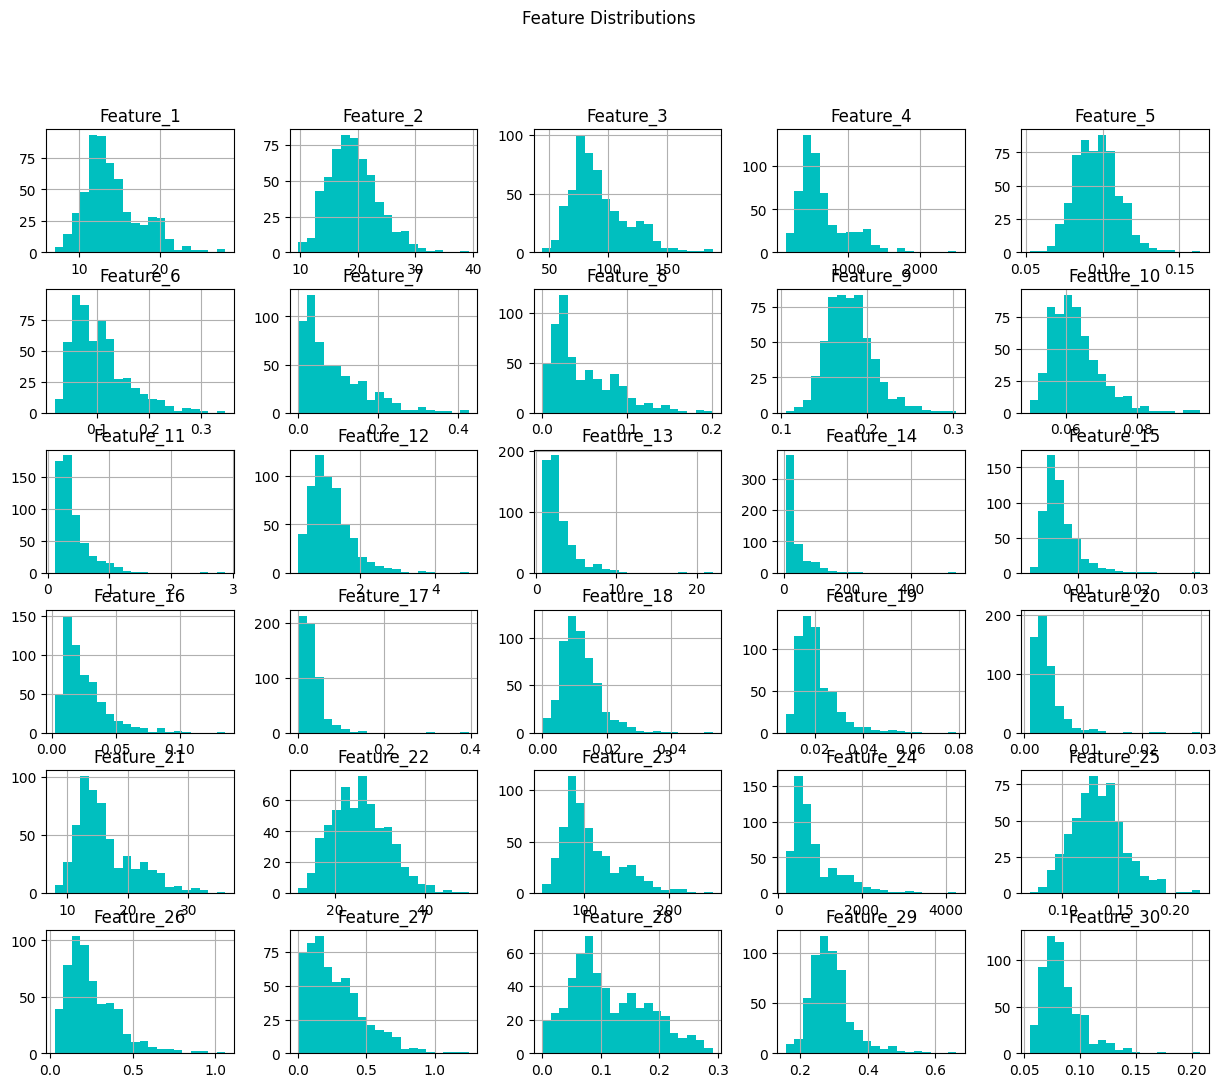

In [26]:
data.iloc[:, 1:].hist(figsize=(15, 12), bins=20, color="c")
plt.suptitle("Feature Distributions")
plt.show()

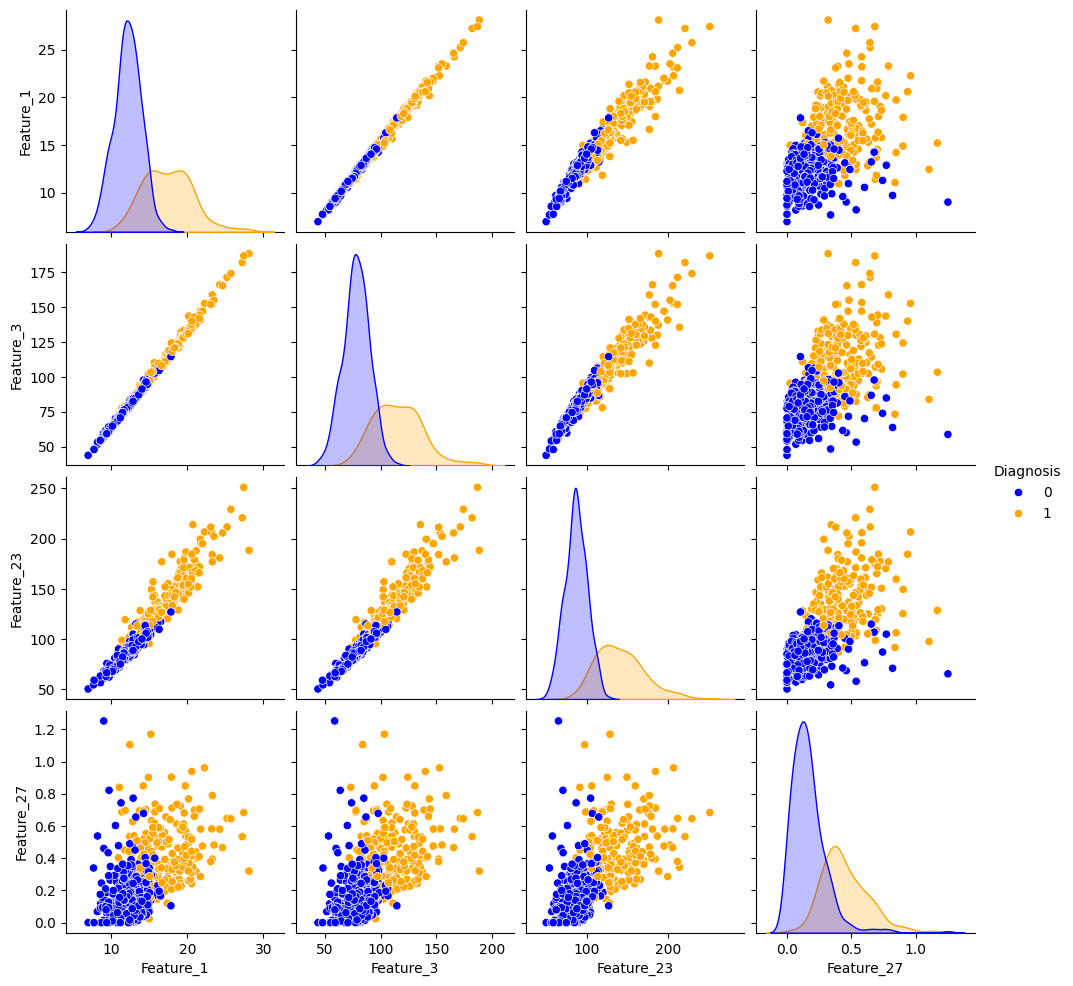

In [27]:
important_features = ["Feature_1", "Feature_3", "Feature_23", "Feature_27"]
sns.pairplot(data, hue="Diagnosis", vars=important_features, palette=["blue", "orange"])
plt.show()

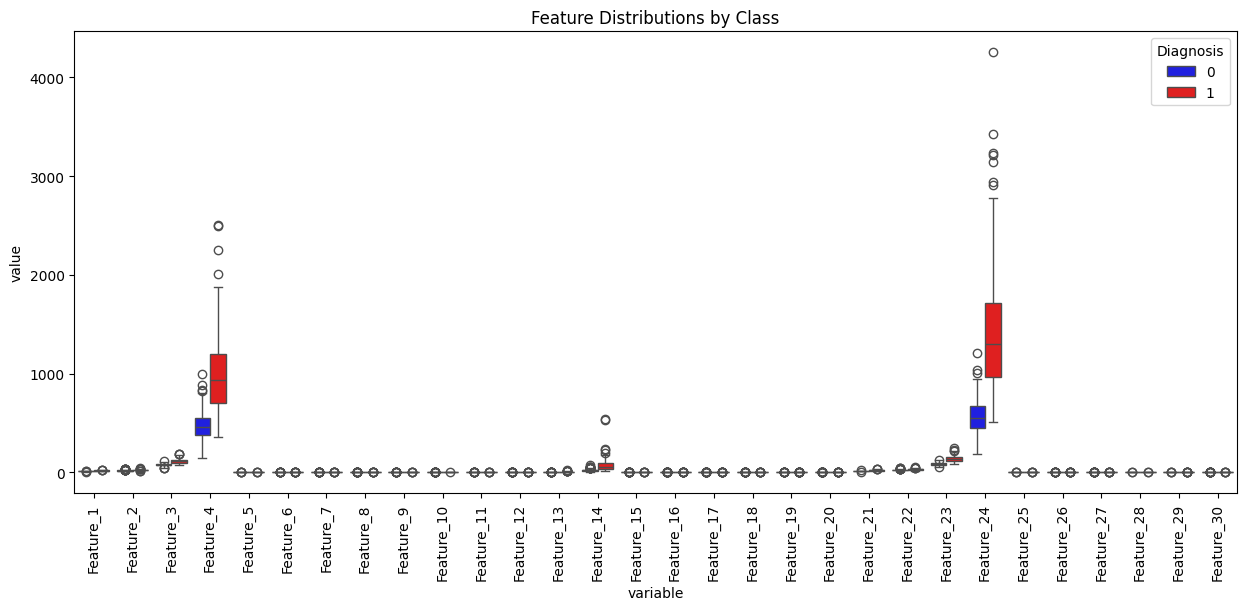

In [28]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="variable", y="value", hue="Diagnosis", 
            data=pd.melt(data, id_vars=["Diagnosis"]), palette=["blue", "red"])
plt.xticks(rotation=90)
plt.title("Feature Distributions by Class")
plt.show()

## PCA for DR

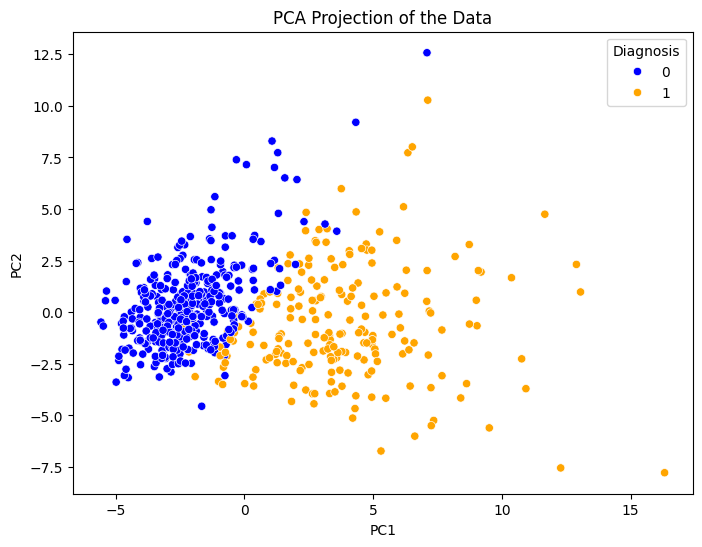

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.iloc[:, 1:])

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Diagnosis"] = data["Diagnosis"]

# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Diagnosis", data=pca_df, palette=["blue", "orange"])
plt.title("PCA Projection of the Data")
plt.show()